In [1]:
"""Your new task will be to use this dataset and use 
attendee_id, event_id and purchase_quad as the feature columns and 
predict or recommend the the purchase_type based on your learning 
of my sent recommendation engine internet site link.

And, do lot of statistical analysis, visualization and some 
correlation check before do the recommendation or prediction 
model train. So, that purpose of prediction and feature dataset 
exploratory analysis done to do insight into dataset columns.

Attendee id is list of ids of unique attendees in the event, 
event_id is event type id, purchase_quad is time of event 
duration time divided into 4 quadrant and purchase_type is 
type of purchase done by the buyer."""

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import seaborn as sns

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import seaborn as sns

In [3]:
df = pd.read_csv('./data/event_1_transactions.csv'
                 , index_col = 0
                )
df.head()

,event_id,attendee_id,order_id,purchase_quad,purchase_type
0,1,342606,3786,2,2
1,1,342606,3786,3,2
2,1,342606,3786,4,0
3,1,342606,3786,1,0
4,1,342606,3786,3,0


In [4]:
print(f'Table size is {df.shape[0]} by {df.shape[1]}')
print(f"There are {df.event_id.nunique()} unique event_id's")
print(f"There are {df.attendee_id.nunique()} unique attendee_id's")
print(f"There are {df.order_id.nunique()} uinque order_id's")
print(f"There are {df.purchase_quad.nunique()} uinque purchase_quad's")
print(f"There are {df.purchase_type.nunique()} uinque purchase_type's")

Table size is 9687 by 5
There are 1 unique event_id's
There are 1996 unique attendee_id's
There are 1773 uinque order_id's
There are 4 uinque purchase_quad's
There are 3 uinque purchase_type's


### Correlations 

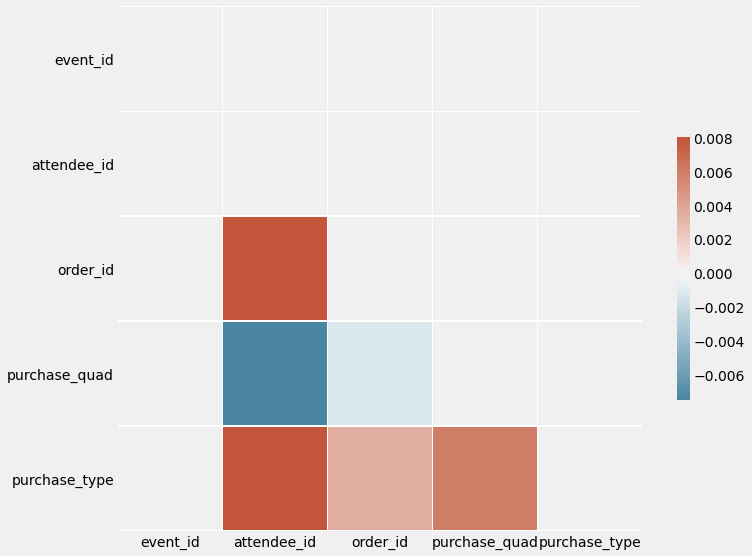

In [5]:
corr = df.corr()
mask = np.triu(np.ones_like(corr
                            , dtype = bool
                           )
              )
f, ax = plt.subplots(figsize = (11,9))
cmap = sns.diverging_palette(230
                             , 20
                             , as_cmap = True
                            )
sns.heatmap(corr
            , mask = mask
            , cmap = cmap
            , vmax = .008
            , center = 0
            , square = True
            , linewidth = 0.5
            , cbar_kws = {"shrink": .5}
           );

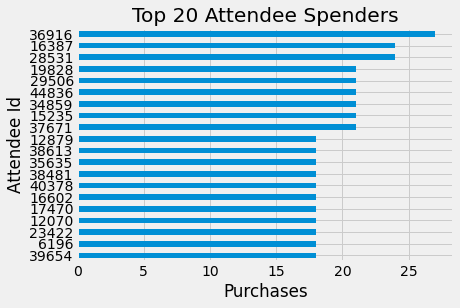

In [6]:
top_attendee_vals = df['attendee_id'].value_counts()[:20].values
attendee = df['attendee_id'].value_counts()[:20].index
attendee_df = pd.DataFrame({'Attendee Id': attendee
                              , 'Purchases': top_attendee_vals
                             })
attendee_df.set_index('Attendee Id', inplace = True)
ax = attendee_df.plot.barh()
ax.get_legend().remove()
plt.xlabel('Purchases')
plt.title('Top 20 Attendee Spenders')
plt.gca().invert_yaxis();

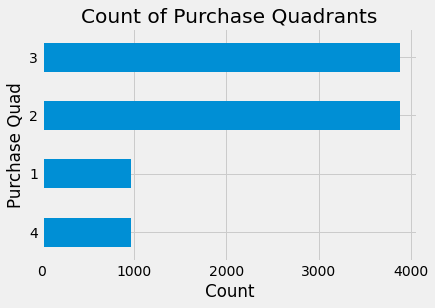

In [7]:
purchase_quad_count = df['purchase_quad'].value_counts().values
purchase_quad = df['purchase_quad'].value_counts().index
purchase_quad_df = pd.DataFrame({'Purchase Quad': purchase_quad
                              , 'Count': purchase_quad_count
                             })
purchase_quad_df.set_index('Purchase Quad', inplace = True)
ax = purchase_quad_df.plot.barh()
ax.get_legend().remove()
plt.xlabel('Count')
plt.title('Count of Purchase Quadrants')
plt.gca().invert_yaxis();

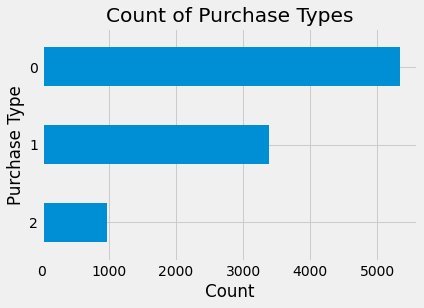

In [8]:
purchase_type_count = df['purchase_type'].value_counts().values
purchase_type = df['purchase_type'].value_counts().index
purchase_type_df = pd.DataFrame({'Purchase Type': purchase_type
                              , 'Count': purchase_type_count
                             })
purchase_type_df.set_index('Purchase Type', inplace = True)
ax = purchase_type_df.plot.barh()
ax.get_legend().remove()
plt.xlabel('Count')
plt.title('Count of Purchase Types')
plt.gca().invert_yaxis();